# REAL E-STATE PRICE PREDICTION PROJECT

In [2]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'C:\\Users\\eshan\\Dropbox\\My PC (LAPTOP-OFMOBQDC)\\Downloads'

In [4]:
os.chdir(r"C:\Users\eshan\OneDrive\Desktop")


In [5]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [6]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# DATA CLEANSING

SIZE AND TOTAL_SQFT FEATURES ARE NOT IN CORRECT DATA TYPE

In [8]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df["size"][11234].split()[0]

'4'

In [10]:
df['bhk'] = df['size'].apply(lambda x: int(x.split()[0]))


AttributeError: 'float' object has no attribute 'split'

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if type(x)==str else x)

In [13]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
bhk               16
dtype: int64

In [88]:
pd.set_option("display.max_rows",None)

In [89]:
df.head(100)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2.0
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,4.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00,4.0
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25,3.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00,6.0


In [94]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [91]:
df["total_sqft"][30].split("-")

['2100 ', ' 2850']

In [93]:
for i,j in enumerate(df["total_sqft"].unique()):
    try:
        if type(float(i))==float:
            pass
    except Exception as e:
        print(e)

In [14]:
for i,j in enumerate(df["total_sqft"]):
    try:
        if type(float(j))==float:
            df["total_sqft"][i]=float(j)
        
    except:
        if "-" in j:
            df["total_sqft"][i]=j.split("-")
        else:
            df["total_sqft"][i]=j
else:
    for i,j in enumerate(df["total_sqft"]):
        if type(j)==float:
                continue
        elif type(j)==list:
            df["total_sqft"][i]=(float(j[0])+float(j[1]))/2
        else:
            df["total_sqft"][i]=np.nan


In [15]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0


# FEATURE ENGINEERING 

## PART-A TREAT MISSING VALUES 

### Method-1 :- Drop missing values( if missing values less than 2-5% of data) or may drop the column as well if it has more than 25-30% missing values

In [16]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft        46
bath              73
balcony          609
price              0
bhk               16
dtype: int64

In [17]:
df_m=df.dropna()
df_m.isnull().sum()


area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [18]:
df_m.shape

(7481, 10)

In [19]:
df_s=df.drop(["society"],axis=1)

In [20]:
df_s.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0


In [21]:
df_m_new=df_s.dropna()

In [23]:
df_m_new.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [22]:
df_m_new.shape

(12668, 9)

### 2- Method :- Mean/ Median Imputation Or Skewness factor ( mere for continuous numerical feature)

#### for mean, median imputation, firstly we will have to check for skewness.

In [24]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft        46
bath              73
balcony          609
price              0
bhk               16
dtype: int64

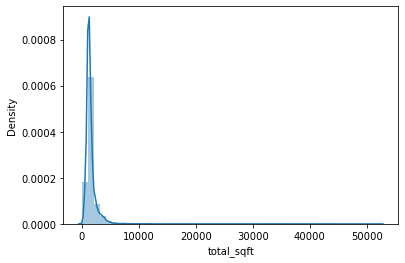

In [25]:
sns.distplot(df["total_sqft"],kde=True)

In [26]:
sk=((df["total_sqft"].mean())-df["total_sqft"].mode())/(df["total_sqft"].std())

In [27]:
sk

0    0.290395
dtype: object

In [28]:
df["total_sqft_mean"]=df["total_sqft"].fillna(df["total_sqft"].mean())

In [29]:
df.isnull().sum()

area_type             0
availability          0
location              1
size                 16
society            5502
total_sqft           46
bath                 73
balcony             609
price                 0
bhk                  16
total_sqft_mean       0
dtype: int64

### 3-Method VARIANCE METHOD REPLACEMENT

In [30]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,total_sqft_mean
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0,1200.0


In [31]:
df_m_ob=df_m[["area_type","bhk"]]

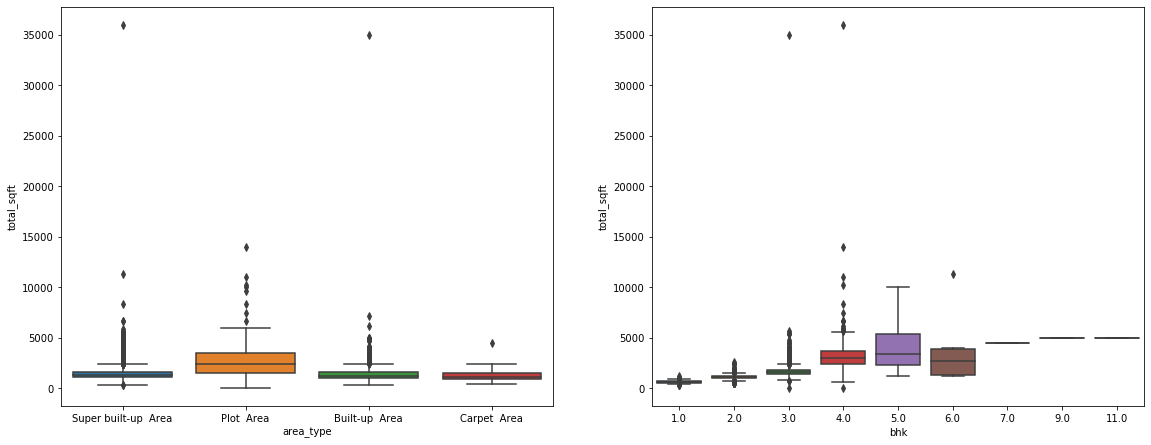

In [33]:
plt.figure(figsize=(30,25))
plotnumber=1
for j in df_m_ob: 
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(y=df["total_sqft"],x=df_m_ob[j])
        plt.xlabel(j)
        plt.ylabel("total_sqft")
        plotnumber+=1
plt.show()

In [35]:
df.groupby("area_type")["total_sqft"].mean()

area_type
Built-up  Area          1618.688934
Carpet  Area            1305.074012
Plot  Area              1841.160234
Super built-up  Area    1481.598013
Name: total_sqft, dtype: float64

In [36]:
df["total_sqft_variance"]=df.groupby(df["area_type"])["total_sqft"].apply(lambda x : x.fillna(x.mean()))

In [37]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,total_sqft_mean,total_sqft_variance
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,1056.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0,2600.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0,1440.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0,1521.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0,1200.0,1200.0


In [38]:
df.isnull().sum()

area_type                 0
availability              0
location                  1
size                     16
society                5502
total_sqft               46
bath                     73
balcony                 609
price                     0
bhk                      16
total_sqft_mean           0
total_sqft_variance       0
dtype: int64

# HANDLING MISSING VALUES IN CASE OF CATEGORICAL FEATURE OR DISCRETE NUMERICAL FEATURE

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13274 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   bhk           13304 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


##### Feature society containing missing values more than 50% and it is categorical also so we will have to drop this feature.

In [40]:
df.drop(["society"],axis=1,inplace=True)

##### BHK,BALCONY and BATH are discrete features so we will fill our missing values by mode

In [43]:
df["bhk"]=df["bhk"].fillna(df["bhk"].mode()[0])

In [47]:
df["balcony"]=df["balcony"].fillna(df["balcony"].mode()[0])

In [49]:
df["bath"]=df["bath"].fillna(df["bath"].mode()[0])

In [52]:
df.isnull().sum()

area_type               0
availability            0
location                0
size                   16
total_sqft             46
bath                    0
balcony                 0
price                   0
bhk                     0
total_sqft_mean         0
total_sqft_variance     0
dtype: int64

In [51]:
df["location"]=df["location"].fillna(df["location"].mode()[0])

# PART-B OUTLIER TREATMENT


## What is outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.


# Types of outliers
Outliers can also come in different flavours, depending on the environment: POINT OUTLIERS, CONTEXTUAL OUTLIERS and COLLECTIVE OUTLIERS.

1) Point outliers are single data points that lay far from the rest of the distribution.

2) Contextual outliers can be noise in data, such as punctuation symbols when realizing text analysis or background noise signal when doing speech recognition.

3) Collective outliers can be subsets of novelties in data such as a signal that may indicate the discovery of new phenomena.

# What causes Outliers?
Outliers can be classified in two broad categories:

1.Artificial (Error) / Non-natural
2.Natural.

# 1) Artificial Causes

1-a) Data Entry Errors:

Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.For example: Annual income of a customer is 100000.Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes $1,000,000 which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.

1-b) Measurement Error:

It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are 10 weighing machines. 9 of them are correct, 1 is faulty. Weight measured by people on the faulty machine will be higher / lower than the rest of people in the group. The weights measured on faulty machine can lead to outliers.

1-c) Experimental Error:

Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier.

1-d) Intentional Outlier:

This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption.

1-e) Data Processing Error:

Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.



# 2) Natural Causes
Track and field performance of asian athlete with jamaican athlete.

What is the impact of Outliers on a dataset?
1) Outliers can drastically change the results of modeling.

2) It increases the error variance and reduces the power of model.

3) If the outliers are non-randomly distributed, they can decrease normality

4) They can bias or influence estimates that may be of substantive interest

## METHOD-1 BOX PLOT METHOD

In [53]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_mean,total_sqft_variance
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,1056.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,2600.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,1440.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,1521.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,1200.0,1200.0


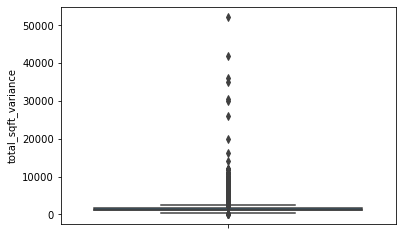

In [55]:
sns.boxplot(y=df["total_sqft_variance"])

In [56]:
q1=df["total_sqft_variance"].quantile(.25)

In [57]:
q3=df["total_sqft_variance"].quantile(.75)

In [58]:
iqr=q3-q1

In [59]:
lower_fence=q1-(1.5*iqr)

In [60]:
upper_fence=q3+1.5*iqr

In [61]:
lower_fence

230.0

In [62]:
upper_fence

2550.0

In [66]:
df_o=df.loc[(df["total_sqft_variance"]>230.0) & (df["total_sqft_variance"]<2551)]

# 2-Method 3 sigma method

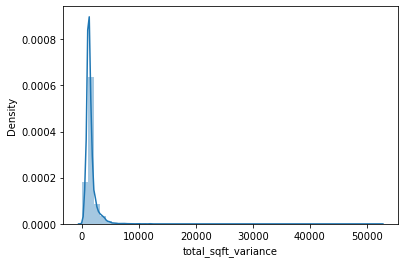

In [67]:
sns.distplot(df["total_sqft_variance"])

In [68]:
min_3sigma,max_3sigma=(df["total_sqft_variance"].mean()-(3*(df["total_sqft_variance"].std()))),(df["total_sqft_variance"].mean()+(3*(df["total_sqft_variance"].std()))) 
min_3sigma,max_3sigma

(-2148.9469305168595, 5268.936013748434)

In [69]:
df_3sigma=df.loc[(df["total_sqft_variance"]>230.0) & (df["total_sqft_variance"]<5268)]

In [70]:
df_3sigma.shape

(13194, 11)

# PART-C HANDLING CATEGORICAL FEATURE

### METHOD-1 ENCODE CATEGORICAL LABELS INTO NUMERICAL VALUES

In [72]:
df_3sigma.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_mean,total_sqft_variance
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,1056.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,2600.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,1440.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,1521.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,1200.0,1200.0


In [73]:
df_3sigma["location"].value_counts()

Whitefield          532
Sarjapur  Road      391
Electronic City     302
Kanakpura Road      273
Thanisandra         234
                   ... 
Medi Agrahara         1
Sundara Nagar         1
Sadduguntepalya       1
Shirdi Sai Nagar      1
Abshot Layout         1
Name: location, Length: 1293, dtype: int64

In [74]:
df_c=pd.get_dummies(df_3sigma["location"])

In [76]:
df_c

,Anekal,Banaswadi,Basavangudi,Bhoganhalli,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,rr nagar,sankeswari,sapthagiri Layout,sarjapura main road,singapura paradise,t.c palya,tc.palya,vinayakanagar,"white field,kadugodi",whitefiled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2-Method Encode top ten categorical labels when feature is nominal and having large no. of labels in it or may be imbalanced

In [81]:
top_10=[i for i in df_3sigma["location"].value_counts().head(10).index]

In [82]:
top_10

['Whitefield',
 'Sarjapur  Road',
 'Electronic City',
 'Kanakpura Road',
 'Thanisandra',
 'Yelahanka',
 'Uttarahalli',
 'Marathahalli',
 'Hebbal',
 'Raja Rajeshwari Nagar']

In [83]:
for i in top_10:
    df_3sigma[i]=np.where(df_3sigma["location"]==i,1,0)

In [84]:
df_3sigma.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_mean,...,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Thanisandra,Yelahanka,Uttarahalli,Marathahalli,Hebbal,Raja Rajeshwari Nagar
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,1056.0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,2600.0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,1440.0,...,0,0,0,0,0,0,1,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,1521.0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,1200.0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df_3sigma["area_type"].value_counts()

Super built-up  Area    8742
Built-up  Area          2401
Plot  Area              1965
Carpet  Area              86
Name: area_type, dtype: int64

In [86]:
df_3sigma.groupby("area_type")["price"].mean()

area_type
Built-up  Area          101.567820
Carpet  Area             90.194244
Plot  Area              187.012906
Super built-up  Area     88.497054
Name: price, dtype: float64

In [87]:
top_3=[i for i in df_3sigma["area_type"].value_counts().head(3).index]

In [88]:
top_3

['Super built-up  Area', 'Built-up  Area', 'Plot  Area']

In [89]:
for i in top_3:
    df_3sigma[i]=np.where(df_3sigma["area_type"]==i,1,0)

In [90]:
df_3sigma.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_mean,...,Kanakpura Road,Thanisandra,Yelahanka,Uttarahalli,Marathahalli,Hebbal,Raja Rajeshwari Nagar,Super built-up Area,Built-up Area,Plot Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,1056.0,...,0,0,0,0,0,0,0,1,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,2600.0,...,0,0,0,0,0,0,0,0,0,1
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,1440.0,...,0,0,0,1,0,0,0,0,1,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,1521.0,...,0,0,0,0,0,0,0,1,0,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,1200.0,...,0,0,0,0,0,0,0,1,0,0


# FEATURE SELECTION

### What is Feature Selection

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

1)Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

2)Improves Accuracy: Less misleading data means modeling accuracy improves.

3)Reduces Training Time: Less data means that algorithms train faster.

### FEATURE SELECTION CAN BE DONE BY 3 WAYS

### 1-FILTER METHOD (Do statistical tests)
### 2-WRAPER METHOD (Do OLS Method -Backward Elimination)
### 3-EMBEDDED METHOD (Feature Importance test )

##### PART-A FILTER METHOD ( DROP UNWANTED COLUMNS)

In [95]:
df_3sigma.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_mean,...,Kanakpura Road,Thanisandra,Yelahanka,Uttarahalli,Marathahalli,Hebbal,Raja Rajeshwari Nagar,Super built-up Area,Built-up Area,Plot Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,1056.0,...,0,0,0,0,0,0,0,1,0,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,2600.0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
df_3sigma.drop(["area_type","availability","location","size","total_sqft","total_sqft_mean"],axis=1,inplace=True)

In [97]:
df_3sigma.shape

(13194, 18)

##### PART-B FILTER METHOD ( CORRELATION METHOD) 

In [101]:
df_3sigma.corr()

,bath,balcony,price,bhk,total_sqft_variance,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Thanisandra,Yelahanka,Uttarahalli,Marathahalli,Hebbal,Raja Rajeshwari Nagar,Super built-up Area,Built-up Area,Plot Area
bath,1.000000,0.213701,0.506736,0.890611,0.520947,0.003182,0.004615,-0.069977,-0.032014,-0.014926,-0.015104,-0.037261,0.001420,0.032325,-0.023993,-0.279251,-0.014027,0.388082
balcony,0.213701,1.000000,0.133724,0.198797,0.232465,0.010728,0.004489,-0.065375,0.028518,-0.013320,-0.006618,0.002594,0.037042,0.008959,0.014119,0.118132,-0.062627,-0.085657
price,0.506736,0.133724,1.000000,0.456242,0.691829,0.025263,0.005756,-0.071227,-0.046836,-0.028226,-0.023422,-0.048740,-0.003568,0.056648,-0.043859,-0.219948,-0.017317,0.313468
bhk,0.890611,0.198797,0.456242,1.000000,0.457490,-0.019775,-0.007113,-0.061259,-0.038966,-0.026648,-0.018868,-0.007462,-0.005780,0.012217,-0.022020,-0.311182,-0.004009,0.419036
total_sqft_variance,0.520947,0.232465,0.691829,0.457490,1.000000,0.067289,0.042821,-0.073489,-0.036335,-0.004488,0.000994,-0.032087,0.023246,0.072995,-0.019915,-0.096398,0.056182,0.071511
Whitefield,0.003182,0.010728,0.025263,-0.019775,0.067289,1.000000,-0.035821,-0.031372,-0.029795,-0.027543,-0.026131,-0.024511,-0.023765,-0.023765,-0.023418,0.016713,-0.017787,0.000832
Sarjapur Road,0.004615,0.004489,0.005756,-0.007113,0.042821,-0.035821,1.000000,-0.026747,-0.025402,-0.023482,-0.022279,-0.020897,-0.020261,-0.020261,-0.019966,0.050036,-0.022187,-0.039209
Electronic City,-0.069977,-0.065375,-0.071227,-0.061259,-0.073489,-0.031372,-0.026747,1.000000,-0.022247,-0.020566,-0.019512,-0.018302,-0.017745,-0.017745,-0.017486,0.011686,0.034209,-0.049791
Kanakpura Road,-0.032014,0.028518,-0.046836,-0.038966,-0.036335,-0.029795,-0.025402,-0.022247,1.000000,-0.019532,-0.018530,-0.017381,-0.016852,-0.016852,-0.016607,0.059814,-0.039578,-0.042859
Thanisandra,-0.014926,-0.013320,-0.028226,-0.026648,-0.004488,-0.027543,-0.023482,-0.020566,-0.019532,1.000000,-0.017130,-0.016068,-0.015579,-0.015579,-0.015352,0.058243,-0.023192,-0.049759


In [107]:
corr=df_3sigma.iloc[:,:].corr()
name_features=corr.index



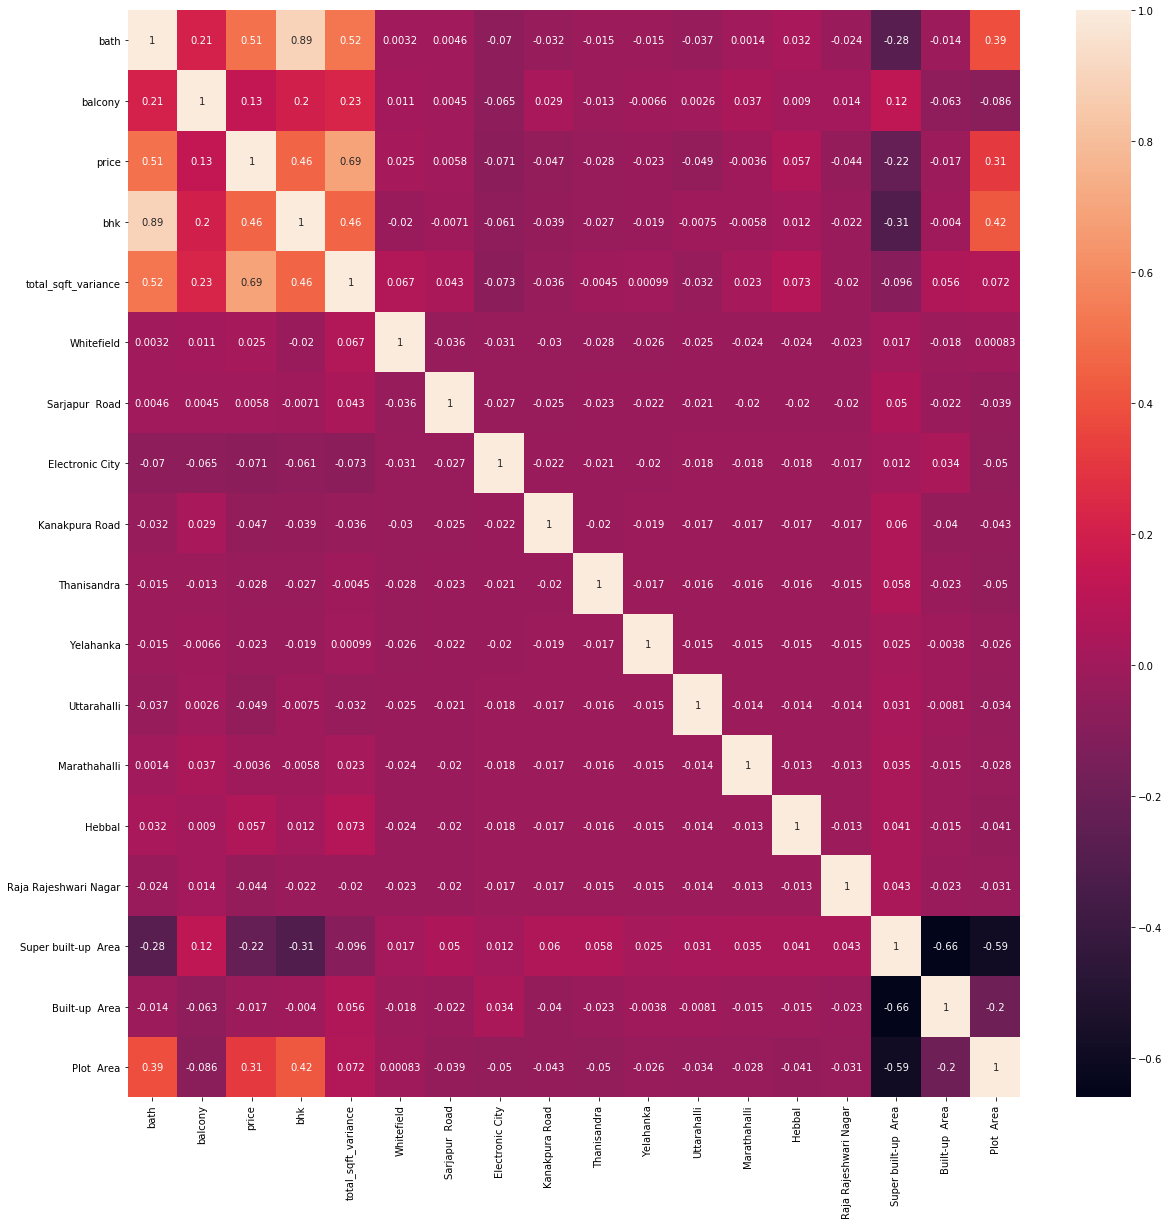

In [98]:
plt.figure(figsize=(20,20))
sns.heatmap(df_3sigma.corr(),annot=True)

In [109]:
corr_target=abs(corr["price"])
corr_target

bath                     0.506736
balcony                  0.133724
price                    1.000000
bhk                      0.456242
total_sqft_variance      0.691829
Whitefield               0.025263
Sarjapur  Road           0.005756
Electronic City          0.071227
Kanakpura Road           0.046836
Thanisandra              0.028226
Yelahanka                0.023422
Uttarahalli              0.048740
Marathahalli             0.003568
Hebbal                   0.056648
Raja Rajeshwari Nagar    0.043859
Super built-up  Area     0.219948
Built-up  Area           0.017317
Plot  Area               0.313468
Name: price, dtype: float64

In [112]:
corr_target[corr_target>.1]

bath                    0.506736
balcony                 0.133724
price                   1.000000
bhk                     0.456242
total_sqft_variance     0.691829
Super built-up  Area    0.219948
Plot  Area              0.313468
Name: price, dtype: float64

# Remove correlated independent features ( Multi collinearity)

Multicollinearity occurs when independent variables in a regression model are correlated. 

This correlation is a problem because independent variables should be independent. 

If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable.

The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. 

In [113]:
w=df_3sigma.corr()

In [114]:
threshold=0.5

In [115]:
corr_matrix=df_3sigma.corr()

In [116]:
len(corr_matrix.columns)

18

In [121]:
df_3sigma_new=df_3sigma.drop(["price"],axis=1)

In [118]:
# find and remove correlated features
def multi_coli(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [122]:
multi_coli(df_3sigma_new,.4)

{'Built-up  Area', 'Plot  Area', 'bhk', 'total_sqft_variance'}

# Feature Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it.

like:-

Linear Regression---Gradient Descent ----Global Minima

Algorithms like KNN,K-Means, SVM , Clustering--- Eucledian Distance

Deep Learning Techniques(Standardization, Scaling)

1.ANN

2.CNN

3.RNN

# Normalization vs Standard Scaling

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. 
It is also known as Min-Max scaling.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0 On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1 If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

### What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Feature scaling: Mu is the mean of the feature values and Feature scaling: Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.



# The Big Question – Normalize or Standardize?


Normalization vs. standardization is an eternal question among machine learning newcomers. 

Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.

This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 

However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization. However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

# Min Max Scaling 
scales the values between 0 to 1. 

## X_scaled = (X - X.min / (X.max - X.min)

In [128]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [129]:
df_scaled_min=min_max.fit_transform(df_3sigma_new)

## Standardization

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

## z=(x-x_mean)/std

In [123]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler=StandardScaler()

In [127]:
df_scaled=scaler.fit_transform(df_3sigma_new)

# BUILD LINEAR REGRESSION MODEL


#### Firstly split the data into train and test

In [131]:
x=df_scaled
y=df_3sigma["price"]

In [132]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)



In [137]:
X_train.shape

(9895, 17)

In [133]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lin_model=lr.fit(X_train,Y_train)

In [138]:
lin_model.coef_

array([13.74502026, -0.50792648, -4.91682984, 67.42278673, -2.53496847,
       -1.34317992, -1.17172324, -1.88497747, -1.6522365 , -1.80780484,
       -1.79852801, -1.58814636,  1.88290764, -2.56301914, -5.89643455,
       -5.84706501, 20.7118018 ])

In [139]:
lin_model.intercept_

105.31000110393964

# R^2 score 

In [135]:
lr.score(X_train,Y_train)

0.5445431048881435

# TEST THE MODEL ON TESTING DATASET

In [140]:
from sklearn.metrics import mean_squared_error,mean_absolute_error



In [141]:
Y_pred=lin_model.predict(X_test)



In [142]:
print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test)))



5146.643051602488
71.74010769160085


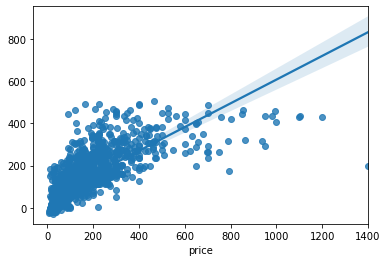

In [143]:
sns.regplot(Y_test,Y_pred)



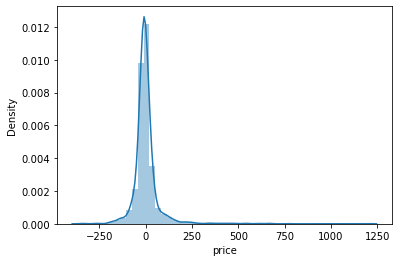

In [144]:
sns.distplot(Y_test-Y_pred)